Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and pandas where they are appropriate!

__Some Sample Answers__

[tmdb example](https://github.com/antra0497/Udacity--Project-Investigate-TMDB-Movies-Dataset/blob/master/investigate-a-dataset-template.ipynb)<br>
    [no show appointments](https://github.com/tkannab/Udacity-DAND-T1-P3-Investigate-a-Dataset/blob/master/investigate-a-dataset.ipynb)
    
__Relationships to note:__

__Independent Variables:__ Patient ID<br>
__Dependent Variables:__
+ (0,1) - Scholarship, Hipertension, Diabetes, Alcoholism, sms_reminder, Gender, no_show, <br>
+ Handcap (0-4) <br>
+ Age (104),<br>
+ Neighbourhood (81),

__Sample correlations to investigate__
+ sheduledays/appointmentdays, no_show, and sms reminder
+ age, and alcoholism/diabetes/hipertension,
+ Neighbouhood, and alcoholism/diabetes/hipertension,
+ gender, and alcoholism/diabetes/hipertension,
+ no_show, and alcoholism/diabetes/hipertension,

__Questions I would be analysing fromthe above dataframe:__
+ What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?
+ 
+ 

In [2]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Load dataset
df = pd.read_csv('noshowappointments.csv')

# Display first 2 rows of dataset
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [3]:
# get the general info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# replace hyphen with underscores, place an undaerscore before day or id and lowercase labels for 2008 dataset
df.rename(columns=lambda x: x.strip().lower().replace("-","_"), inplace=True)

In [5]:
df.rename(columns={'patientid': 'patient_id',
                   'appointmentid': 'appointment_id',
                   'scheduledday': 'scheduled_day',
                  'appointmentday': 'appointment_day'}, inplace=True)

In [6]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


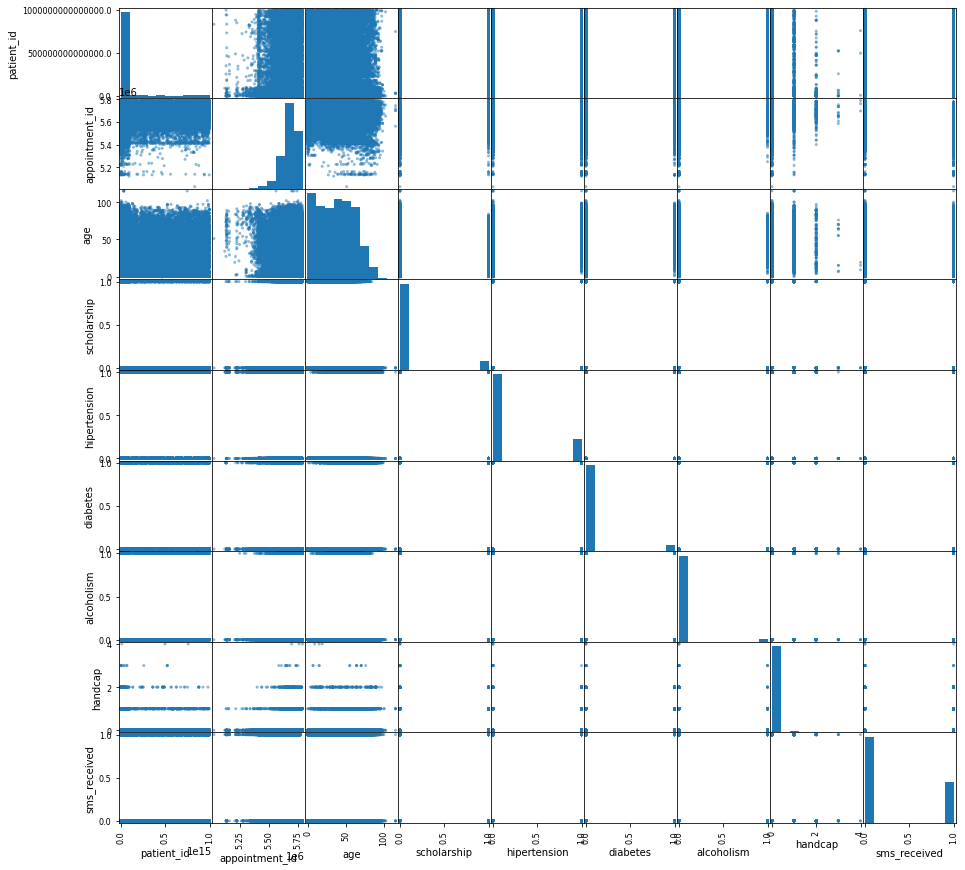

In [7]:
pd.plotting.scatter_matrix(df, figsize = (15,15));

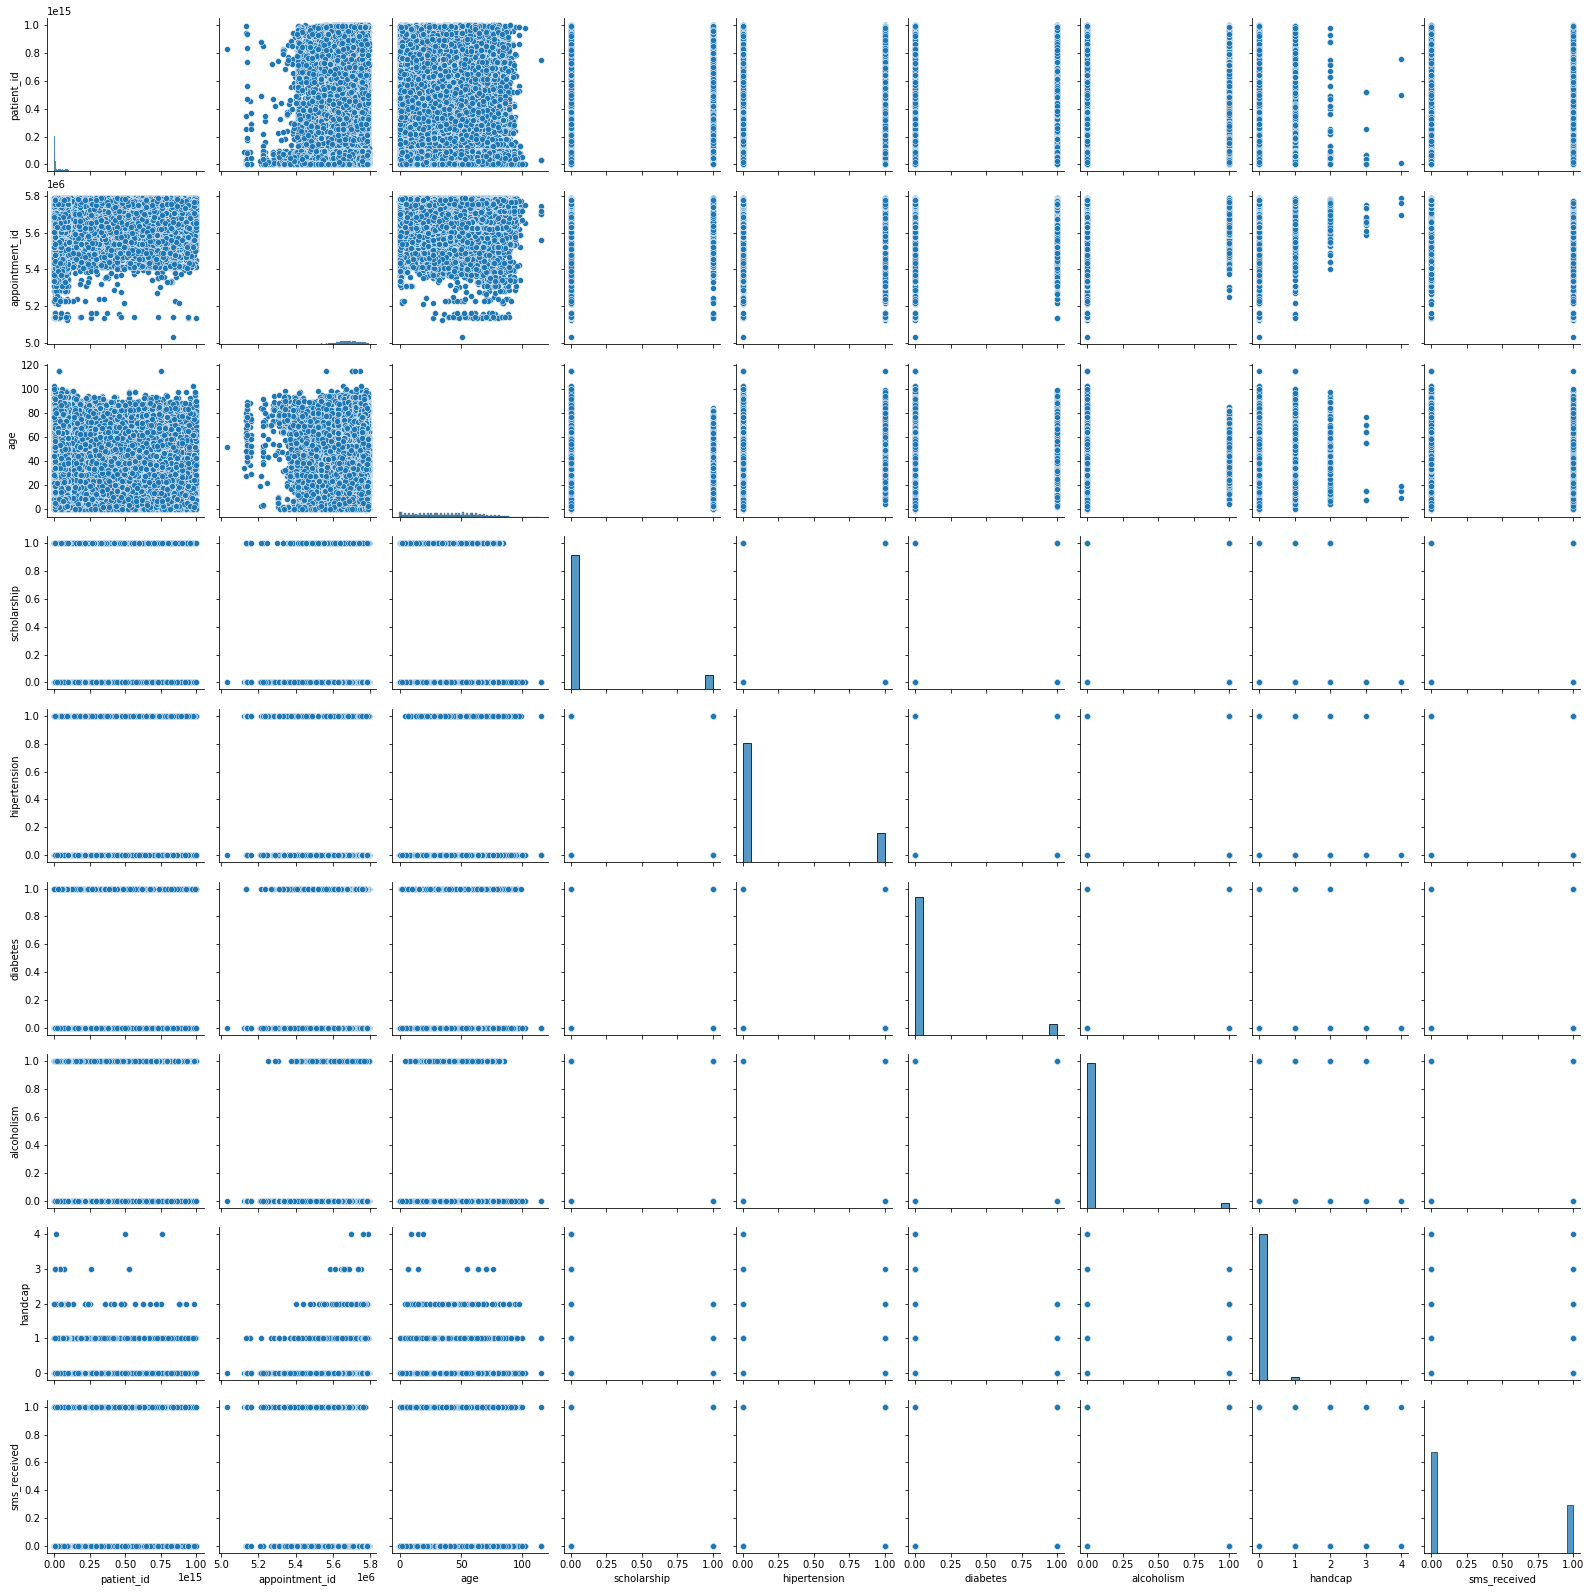

In [8]:
sns.pairplot(df);

In [9]:
df.no_show.unique()

array(['No', 'Yes'], dtype=object)

In [10]:
df.describe()

,patient_id,appointment_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


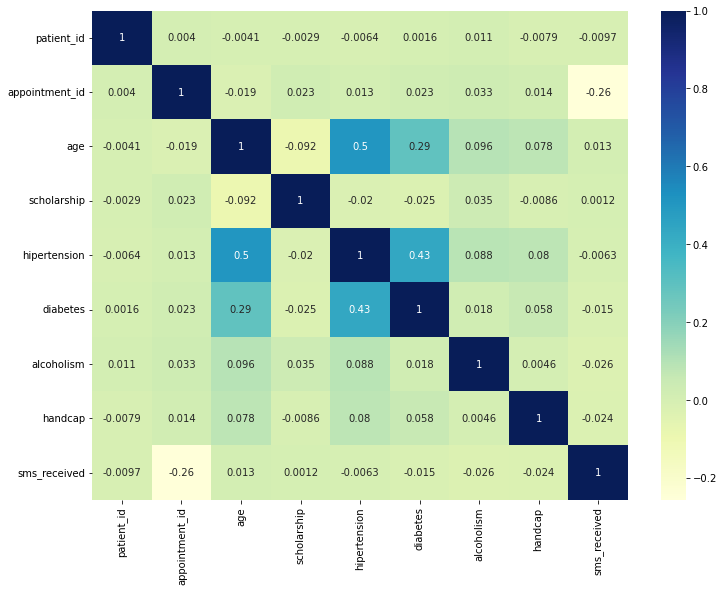

In [11]:
fig, ax = plt.subplots(figsize=(12,9));
sns.heatmap(df.corr(), ax=ax,  annot=True, cmap="YlGnBu");

In [12]:
df.nunique()

patient_id          62299
appointment_id     110527
gender                  2
scheduled_day      103549
appointment_day        27
age                   104
neighbourhood          81
scholarship             2
hipertension            2
diabetes                2
alcoholism              2
handcap                 5
sms_received            2
no_show                 2
dtype: int64

In [13]:
counts = df.Diabetes.value_counts();
plt.pie(counts, labels= ['False', 'True'], autopct='%1.1f%%');

AttributeError: 'DataFrame' object has no attribute 'Diabetes'